**team number:** 8

**team member:** Shangyin Gao, Hanbo Hu, Jia Hua, Siyuan Liu, Xianrui Niu

## Answer

1. 1.5 alomost equal to 90 degrees. If dimension p is very large, the angle between two randomly sampled vectors is 90 degrees.

2. the result didn't change with the increase of sample size, proved below

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline
import time

In [21]:
def angle(v1, v2):
    """
    calculate angel between v1 and v2
    """
    def length(v):
        return math.sqrt(np.dot(v, v))
    
    return math.acos(np.dot(v1, v2) / (length(v1) * length(v2)))

In [22]:
def min_angle(array, idx):
    """
    calculate the min angle between the idx-th vector and others
    array in 2-D form, which include all vectors
    idx is index of one vector in array
    """
    array_without_vec = np.vstack([array[0:idx,:], array[idx+1:,:]])
    angles = [angle(array[idx], array_without_vec[i]) for i in range(len(array_without_vec))]
    
    res = min(angles)
    return res

In [23]:
def min_angles_mean(array):
    """
    array in 2-D form
    return a 1-D array with min_angle
    """
    min_angles = [min_angle(array, idx) for idx in range(array.shape[0])]
    res = np.mean(min_angles)
    return res

In [45]:
def run(array, n_sample, dim):
    """
    array is mean of min angles between vector w.r.t. dimensions
    n_sample is the number of samples
    dim is the max dimension
    """
    # start time
    st = time.time()
    for i in range(dim):
        # sample 100 vectors from dimension 1 to 1000
        X = np.random.rand(n_sample, i+1)*2-1
        # calcuate min_mean for each dimension
        min_mean = min_angles_mean(X)
        # build a 1-D array with i-th number min_angles_mean for i-th dimension
        array.append(min_mean)
    # end time
    et = time.time()
    print('the time cost is:', et-st)

In [46]:
min_angles_means = []
# run, number of sample is 100, dimension is 1000
run(min_angles_means, 100, 1000)

the time cost is: 36.92250990867615


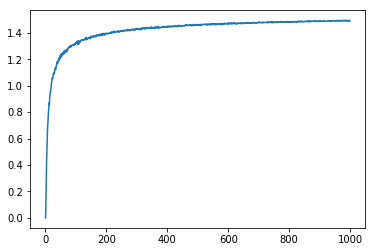

In [47]:
# y is a index for plot
y = range(len(min_angles_means))
plt.plot(y, min_angles_means)

## the relationship between n_samples and resule

In [19]:
# set n_sample to 200 (origion is 100) and run the programm again

In [51]:
min_angles_means_200 = []
# run, number of sample is 100, dimension is 1000
run(min_angles_means_200, 200, 1000)

the time cost is: 159.00530409812927


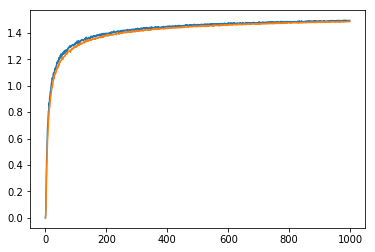

In [63]:
y = range(len(min_angles_means))
plt.plot(y, min_angles_means)
plt.plot(y, min_angles_means_200)
plt.show()